In [10]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl
import matplotlib.cbook as cbook
import matplotlib.image as image
from skimage.transform import resize

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

ff1.Cache.enable_cache('cache') 

In [11]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('Session type')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
ses = input('Session :')
driver = input('Piloto: ')


Año: 2022
Round: 22
Session type
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
Session :R
Piloto: PER


In [12]:
## colormap = mpl.cm.viridis
#colormap = mpl.cm.GnBu
colormap = mpl.cm.RdYlGn

In [13]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()



core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '55', '63', '4', '31', '18', '3', '5', '22', '24', '23', '10', '77', '47', '20', '44', '6', '14']


In [14]:
tm = session.get_driver(driver).TeamName
tm = tm.lower().replace(" ", "")
print(tm)

redbullracing


In [15]:
# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['nGear']      # value to base color gradient on

In [16]:
lap.telemetry['nGear']

2      5
3      5
4      5
5      5
6      5
      ..
685    5
686    5
687    5
688    5
689    5
Name: nGear, Length: 688, dtype: int64

In [17]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

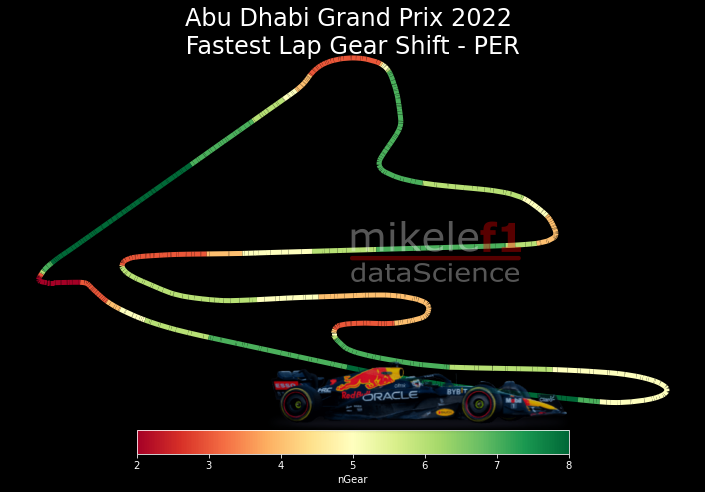

In [18]:
# We create a plot with title and adjust some setting to make it look good.
#Imagen para la marca de agua
#with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
#    im = image.imread(file)

#Imagen para la marca de agua
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)
    
car = image.imread('./images/'+tm+'.png')
res = resize(car, (97, 329))



#Modo oscuro
plt.style.use('dark_background')


fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

plt.rcParams['figure.figsize'] = [13, 13]

plt.suptitle(f"{session.event['EventName']} {session.event.year} \n Fastest Lap Gear Shift - {driver} \n"
             , size=24, y=0.97)

#plt.suptitle(f"\n{session.event['OfficialEventName']} \n Fastest Lap Gear Shift - {driver} \n"
#             , size=25, y=1.02)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal", label="nGear")

fig.figimage(im, xo=350, yo=210, zorder=13, alpha=.35)
fig.figimage(res, xo=255, yo=50, origin='upper', alpha=.80)




# Show the plot


nombrearchivo = str(year)+'-'+str(wknd)+'-GonT-'+ses+'-'+driver+'.png'
plt.savefig(nombrearchivo)
plt.show()
